# Stroke Project

In [6]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns


The data I am working with for this project is a free healthcare data set provided by kaggle (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). The goal of this project is to investigate patient data and determine how certain health attributes may play a role in suffering from a stroke. 

In [7]:
### Load in Data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.dropna()
### Preview of the data set
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
### Total number of patients
print('Number of patients in the data set: {}'.format(len(df)))

Number of patients in the data set: 5110


Right off the bat, we can see that there are a variety of variables (11 total) that include both discrete and continuous values. On top of this, there are also NaN values which I have to dealt with by dropping order to smoothly transtition to the model fitting portion of this project.

But first let us look at some summary statistics and visualizations within the data to get a better understanding of our sample population.

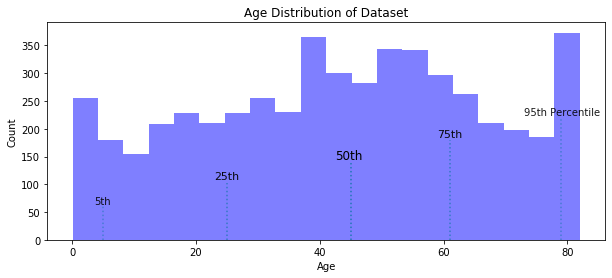

In [9]:
### Isolate Age Data
age_df = df['age']
### Histogram of age Distribution
fig, ax = plt.subplots(figsize = (10,4))
num_bins = 20
n, bins, patches = plt.hist(age_df, num_bins, facecolor='blue', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title("Age Distribution of Dataset")

#Calculate percentiles

quant_5, quant_25, quant_50, quant_75, quant_95 = age_df.quantile(0.05), age_df.quantile(0.25), age_df.quantile(0.5), age_df.quantile(0.75), age_df.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")

#Quantile Labels
ax.text(quant_5-1.5, 65, "5th", size = 10, alpha = 0.9)
ax.text(quant_25-2, 110, "25th", size = 11, alpha = 0.95)
ax.text(quant_50-2.5, 145, "50th", size = 12, alpha = 1)
ax.text(quant_75-2, 185, "75th", size = 11, alpha = 0.95)
ax.text(quant_95-6, 225, "95th Percentile", size = 10, alpha =.9)    
    
    
plt.show()

In [63]:
age_df.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Here we can see that the average patient is in their forties with the mean age being 43 and a median value of 45. Our oldest patient in the data set is 82 while the youngest is less than a year yold (represented by 0.08)

In [10]:
gender = df['gender']
print("Gender Distribution (raw numbers):")
gender.value_counts()

Gender Distribution (raw numbers):


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
print("Gender Distribution (relative values):")
gender.value_counts(normalize=True)

Gender Distribution (relative values):


Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

NameError: name 'xticks' is not defined

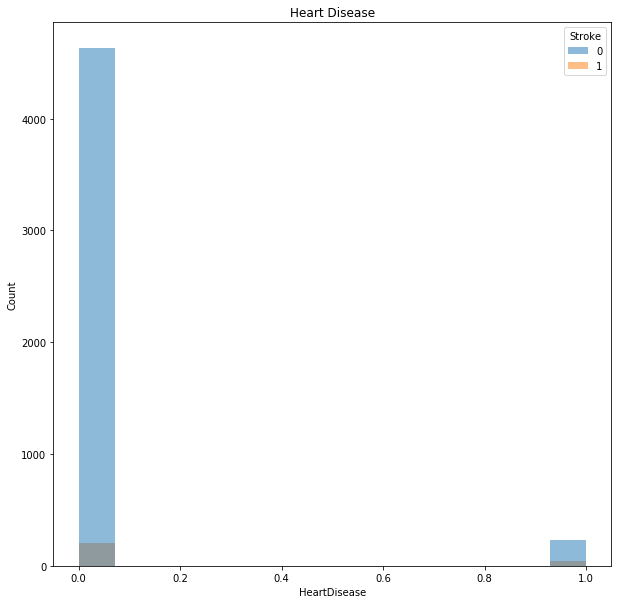

In [19]:
data = {
    'HeartDisease': df['heart_disease'],
    'Stroke': df['stroke']
}

plot_df = pd.DataFrame(data)

#
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=plot_df, x='HeartDisease', hue='Stroke', stat='count', edgecolor=None)
ax.set_title('Heart Disease')
x_ticks = np.arrange(0.0, 1.0, )